Can be used to select the best point in the ROC graph, or when selecting the starting point for epsilon in DBSCAN algorithm.

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt

# Loading Data

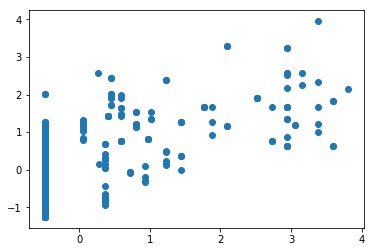

In [2]:
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
plt.scatter(x=x[:,0], y=x[:,1]);

# Creating Data for Elbow/Knee Detection

In [3]:
def get_avg_knn_dist(values, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(values) # +1 because first neighbour is the point itself
    distances, _ = nbrs.kneighbors(values)
    
    return np.sort(distances[:,1:].mean(axis=1))

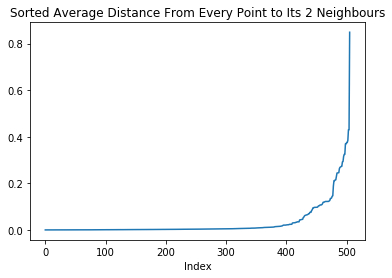

In [4]:
K = 2

avg_distances = get_avg_knn_dist(values=x, k=K)

plt.plot(avg_distances)
plt.title('Sorted Average Distance From Every Point to Its ' + str(K) + ' Neighbours')
plt.xlabel('Index');

# Detecting Elbow/Knee

https://dataplatform.cloud.ibm.com/analytics/notebooks/54d79c2a-f155-40ec-93ec-ed05b58afa39/view?access_token=6d8ec910cf2a1b3901c721fcb94638563cd646fe14400fecbb76cea6aaae2fb1

In [5]:
# Distances from every point to the line which connects first and last points in the sorted list of values
def get_distances_to_line(values):
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T

    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

    vecFromFirst = allCoord - firstPoint

    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    return distToLine

In [6]:
distToLine = get_distances_to_line(avg_distances)
idxOfBestPoint = np.argmax(distToLine)

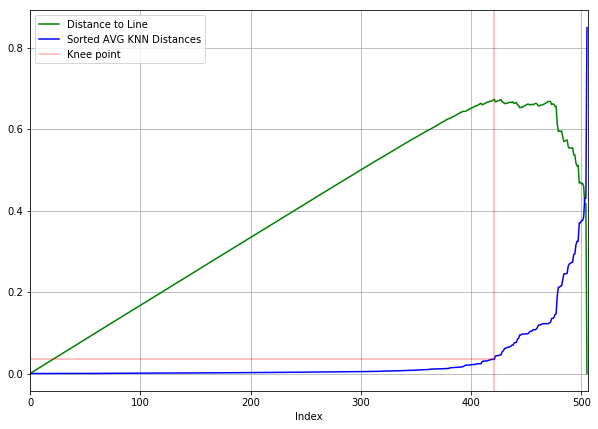

In [7]:
plt.figure(figsize=(10, 7))

plt.plot(distToLine, label='Distance to Line', c='g')
plt.plot(avg_distances, label='Sorted AVG KNN Distances', c='b')

plt.xlim((0,len(avg_distances)))

plt.axhline(y=avg_distances[idxOfBestPoint], xmin=0, xmax=idxOfBestPoint / len(avg_distances), c='r', alpha=0.3)
plt.axvline(x=idxOfBestPoint, c='r', alpha=0.3, label='Knee point')
plt.xlabel('Index')

plt.legend()
plt.grid()